In [1]:
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import numpy.ma as ma
import os
import time

import pandas as pd
# from lmfit.models import GaussianModel, Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import mixture, metrics

# from shapely.geometry import Polygon

from scipy.stats.distributions import norm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

from matplotlib import pyplot as plt
from matplotlib import cm

from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

from scipy import ndimage as ndi
from scipy.spatial import distance
from numpy import linalg

import skimage
from skimage import io, transform
from skimage.draw import ellipse
from skimage.color import rgb2gray
from skimage import filters
from skimage.morphology import disk
from skimage import color
from skimage import filters, util
from skimage.morphology import disk, skeletonize, ball

from PIL import Image, ImageDraw, ImageFilter, ImageOps
import copy
import cv2
import os
import sys

from skimage.measure import approximate_polygon

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage import distance_transform_edt as edt
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
import logging
import glob

# from radio_beam.commonbeam import getMinVolEllipse
#
# from src.utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology,grainGenerate
# from src.cfg import CfgAnglesNames, CfgBeamsNames, CfgDataset
#
# import plotly.graph_objects as go

from matplotlib.image import NonUniformImage
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

from tqdm.notebook import tqdm
import json

import cv2

from sklearn.metrics import pairwise_distances
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import scipy

from shapely.geometry import Polygon
from sklearn import linear_model


In [ ]:
{'path': paths[i],
 'name': name,
 'type': types_dict[name],
 'legend': [{'a_beams': legend1, 'b_beams': legend2}],
 'density_curve_scatter': [
     {'a_beams': (x1.flatten(), y1.flatten()),
      'b_beams': (x2.flatten(), y2.flatten()),
      'angles':(x_angles.flatten(), y_angles.flatten())
      }
 ],
 'linear_approx_plot': [{'a_beams': (x_pred1.flatten(), y_pred1.flatten()),
                         'b_beams': (x_pred2.flatten(), y_pred2.flatten())}],
 'linear_approx_data': [{'a_beams': {'k': k1, 'b': b1, 'angle': angle1, 'score': score1},
                         'b_beams': {'k': k2, 'b': b2, 'angle': angle2, 'score': score2}}],
 'beams_length_series': [{'a_beams': all_a_beams, 'b_beams': all_b_beams}],
 'angles_series': all_angles,
 'contours_series': all_contours,
 'pixel2meter': pixel,
 }

In [4]:
pixel = 50 / 1000
print(pixel)
pixel=pow(pixel,2)
pixel

0.05


0.0025000000000000005

In [7]:
def polygon_area(x,y):
    # coordinate shift
    x_ = x - x.mean()
    y_ = y - y.mean()

    correction = x_[-1] * y_[0] - y_[-1]* x_[0]
    main_area = np.dot(x_[:-1], y_[1:]) - np.dot(y_[:-1], x_[1:])
    return 0.5*np.abs(main_area + correction)

In [20]:
def polygons_area_all(data,saved_image_name, step, N, M, indices=None,save=False, start=0,end=-7):
    #
    # вывод распределения длин а- и б- полуосей для разных образцов
    #

    angles_size=[3,8,18]

    pixel = 50 / 1000
    pixel=pow(pixel,2)

    alloys_indices=range(data['data'].__len__())

    if indices is not None:
        alloys_indices=indices

    # fig,(ax1,ax2)=plt.subplots(1,2,figsize=(N, M))
    fig=plt.figure(figsize=(N,M),facecolor='white')
    fig.patch.set_facecolor('white')
    ax = plt.axes()
    ax.set_facecolor("white")

    font_size=20
    plt.rcParams.update({'font.size': font_size})



    # ax1.set_ylabel('ln( p(x) )')
    # ax2.set_ylabel('ln( p(x) )')

    # ax2.set_xlabel('Большая полуось, мкм')
    # ax1.set_xlabel('Малая полуось, мкм', )

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors = ['orange', 'red','blue','green', 'indigo']

    # linear approx
    # for i in alloys_indices:
    #
    #     ax1.plot(data['data'][i]['linear_approx_plot'][0]['a_beams'][0],
    #              data['data'][i]['linear_approx_plot'][0]['a_beams'][1],color=colors[i])
    #     ax2.plot(data['data'][i]['linear_approx_plot'][0]['b_beams'][0],
    #              data['data'][i]['linear_approx_plot'][0]['b_beams'][1],color=colors[i])

    legend_a=[]

    s=60
    # s=10


    # density curve
    for k,i in tqdm(enumerate(alloys_indices)):
        marker = markers[i]

        polygon_areas=[]
        cnts=data['data'][i]['contours_series']
        # cnts_np=[]
        for cnt in cnts:
            cnt = np.array(cnt)
            # polygon_areas.append(polygon_area(cnt[:,0],cnt[:,1]))
            # coords = approximate_polygon(cnt, tolerance=3)
            # polygon_areas.append(cv2.contourArea(cnt))
            polygon_areas.append(cv2.contourArea(cnt))

        # print('middle')
        # polygon_areas1, polygon_areas_set, polygon_areas_curve = grainStats.stats_preprocess(polygon_areas, step)
        images_num=data['data'][i]['linear_approx_plot'][0]['a_beams'][0].__len__()

        co_fraction=np.sum(polygon_areas)/(pow(1535,2)*images_num)

        polygon_areas=np.array(polygon_areas).astype(np.float64)

        # cnts_np=np.array(cnts_np,dtype=object).reshape((-1,2))
        # print(max(cnts_np[:,0]))
        # print(max(cnts_np[:,1]))
        # print('----')

        polygon_areas*=pixel

        # areas_thresh=np.sum(np.where(polygon_areas<=cmp_area,polygon_areas,0))
        # areas_thresh/=np.sum(polygon_areas)

        low, high = np.floor(polygon_areas.min()), np.ceil(polygon_areas.max())
        low=int(low)
        high=int(high)

        bins = np.linspace(low, high, int(high - low))
        hist, edges = np.histogram(polygon_areas, bins=bins, density=True)
        hist/=sum(hist)
        print(sum(hist))

        hist=np.log(hist)

        edges=edges[:-1]

        hist=hist[start:end]
        edges=edges[start:end]

        hist=[h for h in hist if h>-8 ]
        polygon_areas=polygon_areas[:len(hist)]
        edges=edges[:len(hist)]


        plt.scatter(edges,hist,  marker=marker,color=colors[i],s=s)
        # plt.hist(hist,  color=colors[i])

        legend_a.append(data['data'][i]['name']+' '+data['data'][i]['type']+f'\nсредняя площадь={round(np.mean(polygon_areas),4)} $мкм^2$\n доля кобальта ={np.round(co_fraction,3)}\n std={np.round(np.std(polygon_areas),4)}')

        # print('end ----')
    # ax1.set_facecolor("White")
    # ax2.set_facecolor("White")
    plt.legend(legend_a, loc=1)
    plt.ylabel('p ( x )')
    # plt.xlabel('Эффективный радиус регионов кобальта, $мкм^2$')
    plt.xlabel('Площадь регионов кобальта, $мкм^2$')
    # ax2.legend(legend_a, loc=1)


    # plt.yticks(np.arange(0,0.035,0.01))
    # ax2.set_xticks(np.arange(0,12,3))
    # plt.xlim(0,20)
    # plt.ylim(0,0.15)
    # plt.ylim(-8,0)
    if save:
        # fig.subplots_adjust(wspace=0.25)
        plt.savefig(f'polygons_area_{saved_image_name}_step_{step}.png',bbox_inches='tight')
        # img_plot=io.imread(f'bimodal_beams_{saved_image_name}_step_{step}.png')

        # for i in range(k):
        #     step_img=img_plot.shape[1]/k
        #     io.imsave(f'bimodal_beams_{plot_names[i]}_{saved_image_name}_step_{step}.png',img_plot[:,int(i*step_img):int((i+1)*step_img)])

    plt.show()


In [4]:
step = 2

# path=f'left_(1500,1500,1)_step_{step}_beams.json'
path=f'bc_left_(1536,1536,1)_preprocess_step_{step}_beams.json'

data = open(path,encoding='utf-8')
data = json.load(data)

In [78]:
np.power(42.1,2/3)

12.101932619383101

0it [00:00, ?it/s]

1.0000000000000007


/var/folders/zs/yzy0xdy166x3hv5mvqzqrnlm0000gn/T/ipykernel_47602/363499162.py:91: RuntimeWarning: divide by zero encountered in log
  hist=np.log(hist)


1.0000000000000002
0.9999999999999998


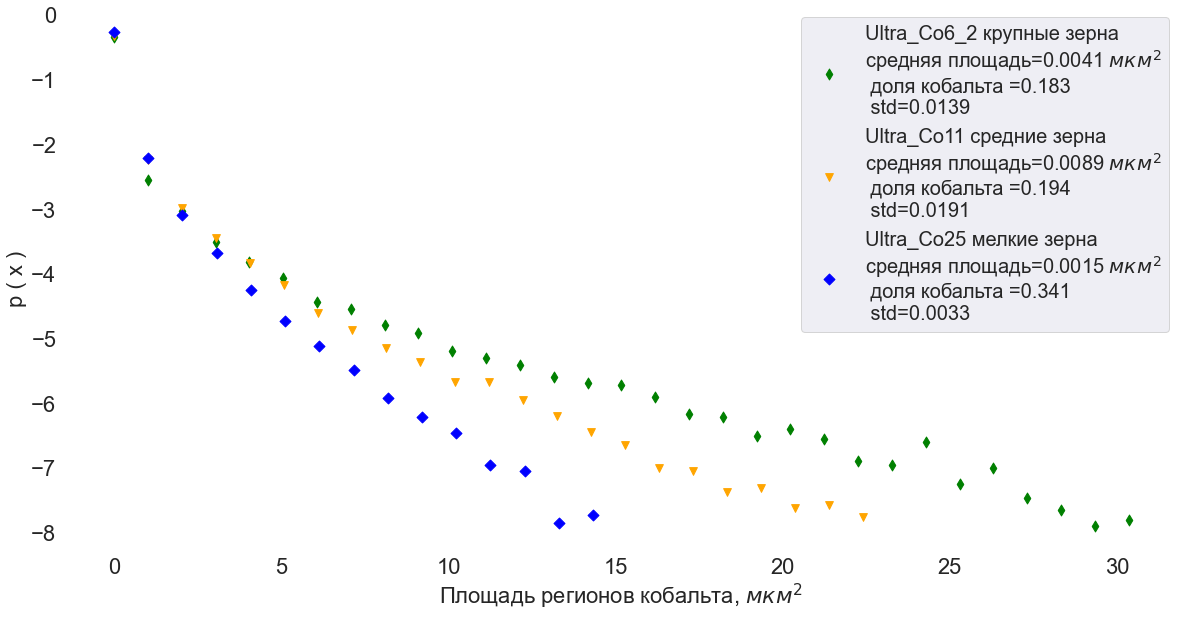

CPU times: user 4.59 s, sys: 1.14 s, total: 5.73 s
Wall time: 6.15 s


In [21]:
%%time
N = 20
M = 10

save=False
# save=True

plt.rcParams['font.size'] = '22'

saved_image_name=f'original_effective_radius'
# saved_image_name=f'original'

a=polygons_area_all(data,saved_image_name, step, N, M, indices=[3,0,2],save=save,end=-15)
# polygons_area_all(data,saved_image_name, step, N, M, indices=[3,0,2],save=save,end=None)
# polygons_area_all(path,saved_image_name, step, N, M, indices=None,save=save)


In [13]:
def polygons_area_all(data,saved_image_name, step, N, M, indices=None,save=False, start=0,end=-7):
    #
    # вывод распределения длин а- и б- полуосей для разных образцов
    #

    pixel = 50 / 1000
    pixel=pow(pixel,2)

    alloys_indices=range(data['data'].__len__())

    if indices is not None:
        alloys_indices=indices

    # fig,(ax1,ax2)=plt.subplots(1,2,figsize=(N, M))
    fig=plt.figure(figsize=(N,M),facecolor='white')
    fig.patch.set_facecolor('white')
    ax = plt.axes()
    ax.set_facecolor("white")

    font_size=20
    plt.rcParams.update({'font.size': font_size})



    # ax1.set_ylabel('ln( p(x) )')
    # ax2.set_ylabel('ln( p(x) )')

    # ax2.set_xlabel('Большая полуось, мкм')
    # ax1.set_xlabel('Малая полуось, мкм', )

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors = ['orange', 'red','blue','green', 'indigo']

    # linear approx
    # for i in alloys_indices:
    #
    #     ax1.plot(data['data'][i]['linear_approx_plot'][0]['a_beams'][0],
    #              data['data'][i]['linear_approx_plot'][0]['a_beams'][1],color=colors[i])
    #     ax2.plot(data['data'][i]['linear_approx_plot'][0]['b_beams'][0],
    #              data['data'][i]['linear_approx_plot'][0]['b_beams'][1],color=colors[i])

    legend_a=[]

    s=60
    # s=10


    # density curve
    for i in tqdm(alloys_indices):
        # print('------')
        marker = markers[i]

        polygon_areas=[]
        cnts=data['data'][i]['contours_series']
        for cnt in cnts:
            cnt = np.array(cnt)
            polygon = Polygon(cnt)
            polygon_areas.append(polygon.area*pixel)

        # print('middle')
        # polygon_areas1, polygon_areas_set, polygon_areas_curve = grainStats.stats_preprocess(polygon_areas, step)
        polygon_areas=np.array(polygon_areas).astype(np.float64)
        polygon_areas=np.sqrt(polygon_areas)

        low, high = np.floor(polygon_areas.min()), np.ceil(polygon_areas.max())
        low=int(low)
        high=int(high)

        bins = np.linspace(low, high, int(high - low)*3)
        hist, edges = np.histogram(polygon_areas, bins=bins, density=True)
        hist/=sum(hist)
        print(sum(hist))

        hist=np.log(hist)

        edges=edges[:-1]

        hist=hist[start:end]
        edges=edges[start:end]




        plt.scatter(edges,hist,  marker=marker,color=colors[i],s=s)
        # plt.hist(hist,  color=colors[i])


        legend_a.append(data['data'][i]['name']+' '+data['data'][i]['type']+f'\nсредний радиус={round(np.mean(polygon_areas),2)} $мкм^2$')

        # print('end ----')
    # ax1.set_facecolor("White")
    # ax2.set_facecolor("White")
    plt.legend(legend_a, loc=1)
    plt.ylabel('p ( x )')
    plt.xlabel('Эффективный радиус регионов кобальта, $мкм^2$')
    # plt.xlabel('Площадь регионов кобальта, $мкм^2$')
    # ax2.legend(legend_a, loc=1)


    # plt.yticks(np.arange(0,0.035,0.01))
    # ax2.set_xticks(np.arange(0,12,3))
    # plt.xlim(0,5000)
    # plt.ylim(0,1)
    if save:
        # fig.subplots_adjust(wspace=0.25)
        plt.savefig(f'polygons_area_{saved_image_name}_step_{step}.png',bbox_inches='tight')
        # img_plot=io.imread(f'bimodal_beams_{saved_image_name}_step_{step}.png')

        # for i in range(k):
        #     step_img=img_plot.shape[1]/k
        #     io.imsave(f'bimodal_beams_{plot_names[i]}_{saved_image_name}_step_{step}.png',img_plot[:,int(i*step_img):int((i+1)*step_img)])

    plt.show()


In [ ]:
N = 15
M = 7

save=False
# save=True

plt.rcParams['font.size'] = '22'

saved_image_name=f'original_effective_radius'
# saved_image_name=f'original'

a=polygons_area_all(data,saved_image_name, step, N, M, indices=[3,0,2],save=save,end=-15)
# polygons_area_all(data,saved_image_name, step, N, M, indices=[3,0,2],save=save,end=None)
# polygons_area_all(path,saved_image_name, step, N, M, indices=None,save=save)
